# EDA Report

In [1]:
import pandas as pd

# Load the two uploaded datasets
file1_path = "https://raw.githubusercontent.com/chaitanya-0b10/ML-Project-/refs/heads/main/coin_gecko_2022-03-16.csv"
file2_path = "https://raw.githubusercontent.com/chaitanya-0b10/ML-Project-/refs/heads/main/coin_gecko_2022-03-17.csv"

df1 = pd.read_csv(file1_path)
df2 = pd.read_csv(file2_path)

# Display basic info about each dataframe
df1_info = df1.info()
df2_info = df2.info()

# Show top few rows of each dataframe for quick inspection
df1_head = df1.head()
df2_head = df2.head()

df1.shape, df2.shape, df1_head, df2_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          497 non-null    float64
 4   24h         497 non-null    float64
 5   7d          497 non-null    float64
 6   24h_volume  497 non-null    float64
 7   mkt_cap     500 non-null    float64
 8   date        500 non-null    object 
dtypes: float64(6), object(3)
memory usage: 35.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        500 non-null    object 
 1   symbol      500 non-null    object 
 2   price       500 non-null    float64
 3   1h          496 non-null    float64
 4   24h         496 non-null    float64
 

((500, 9),
 (500, 9),
        coin symbol         price     1h    24h     7d    24h_volume  \
 0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
 1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
 2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
 3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
 4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   
 
         mkt_cap        date  
 0  7.709915e+11  2022-03-16  
 1  3.271044e+11  2022-03-16  
 2  7.996516e+10  2022-03-16  
 3  6.404382e+10  2022-03-16  
 4  5.222214e+10  2022-03-16  ,
        coin symbol         price     1h    24h     7d    24h_volume  \
 0   Bitcoin    BTC  40851.380000  0.001  0.000 -0.027  2.047612e+10   
 1  Ethereum    ETH   2824.420000  0.004  0.029  0.034  1.364041e+10   
 2    Tether   USDT      1.000000 -0.000  0.000  0.000  4.413140e+10   
 3       BNB    BNB    389.610000  0.002  0.016 -0.010  1.425354e+09 

In [2]:
# First, clean and preprocess both datasets
# 1. Parse dates
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])

# 2. Check and count missing values
missing_df1 = df1.isnull().sum()
missing_df2 = df2.isnull().sum()

# 3. Prepare to merge datasets on 'symbol' to analyze day-over-day changes
merged_df = pd.merge(df1, df2, on='symbol', suffixes=('_0316', '_0317'))

# 4. Calculate day-over-day changes for price, volume, and market cap
merged_df['price_change'] = merged_df['price_0317'] - merged_df['price_0316']
merged_df['volume_change'] = merged_df['24h_volume_0317'] - merged_df['24h_volume_0316']
merged_df['mkt_cap_change'] = merged_df['mkt_cap_0317'] - merged_df['mkt_cap_0316']

# Display summary of cleaned data and day-over-day changes
missing_df1, missing_df2, merged_df[['symbol', 'price_change', 'volume_change', 'mkt_cap_change']].head()


(coin          0
 symbol        0
 price         0
 1h            3
 24h           3
 7d            3
 24h_volume    3
 mkt_cap       0
 date          0
 dtype: int64,
 coin          0
 symbol        0
 price         0
 1h            4
 24h           4
 7d            5
 24h_volume    4
 mkt_cap       0
 date          0
 dtype: int64,
   symbol  price_change  volume_change  mkt_cap_change
 0    BTC     -8.080000  -1.491465e+10    5.085971e+09
 1    ETH     80.010000  -6.108286e+09    1.197278e+10
 2   USDT      0.000000  -1.380357e+10    2.407240e+08
 3    BNB      6.180000   2.949995e+07    1.517341e+09
 4   USDC     -0.000135  -3.024571e+08    3.739310e+08)

<Figure size 1800x1000 with 0 Axes>

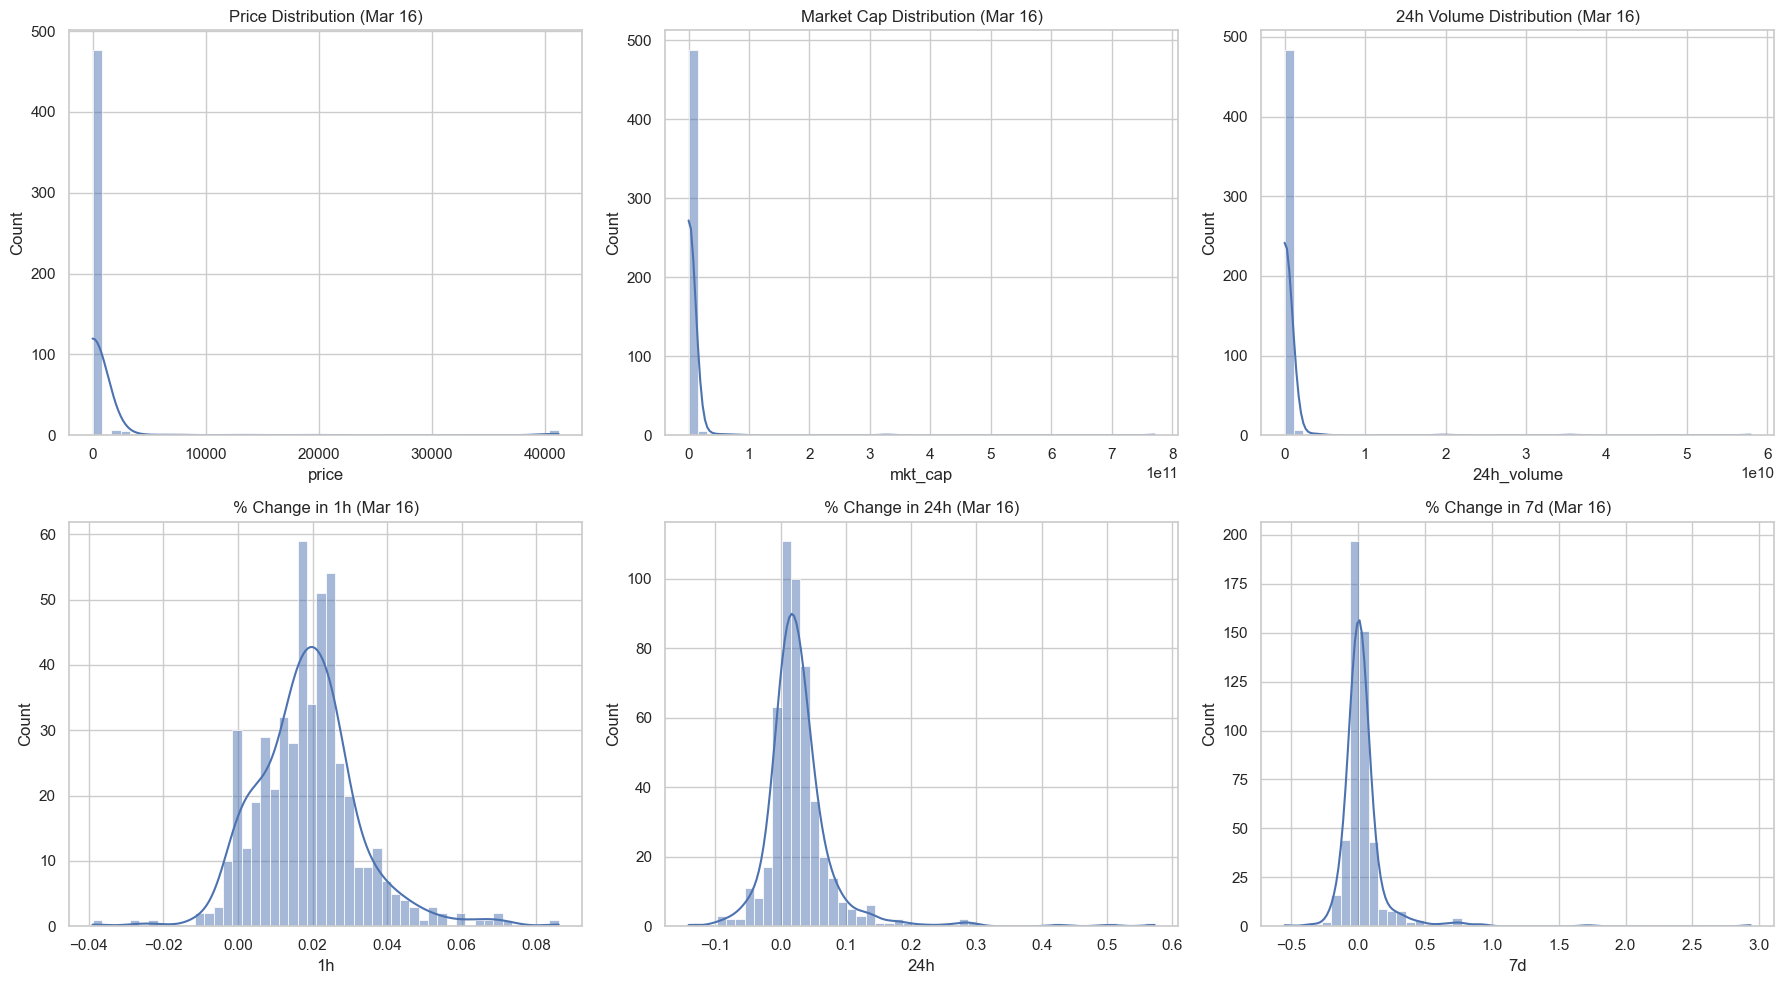

,price,24h_volume,mkt_cap,1h,24h,7d
count,5.000000e+02,4.970000e+02,5.000000e+02,497.000000,497.000000,497.000000
mean,6.527851e+02,3.276644e+08,3.722677e+09,0.018746,0.028849,0.039016
std,4.578529e+03,3.182264e+09,3.784349e+10,0.013867,0.058065,0.203688
min,1.544000e-09,0.000000e+00,6.577043e+07,-0.039000,-0.141000,-0.547000
25%,1.904625e-01,1.838591e+06,1.146391e+08,0.011000,0.004000,-0.020000
50%,1.085000e+00,8.581305e+06,2.083208e+08,0.018000,0.021000,0.006000
75%,6.925000e+00,4.075655e+07,5.845642e+08,0.026000,0.040000,0.049000
max,4.121727e+04,5.793497e+10,7.709915e+11,0.086000,0.573000,2.935000


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set(style="whitegrid")
plt.figure(figsize=(18, 10))

# Descriptive statistics for March 16
desc_stats = df1[['price', '24h_volume', 'mkt_cap', '1h', '24h', '7d']].describe()

# Plot distributions
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Price distribution
sns.histplot(df1['price'], bins=50, kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Price Distribution (Mar 16)')

# Market Cap distribution
sns.histplot(df1['mkt_cap'], bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Market Cap Distribution (Mar 16)')

# Volume distribution
sns.histplot(df1['24h_volume'], bins=50, kde=True, ax=axs[0, 2])
axs[0, 2].set_title('24h Volume Distribution (Mar 16)')

# % Change (1h)
sns.histplot(df1['1h'].dropna(), bins=50, kde=True, ax=axs[1, 0])
axs[1, 0].set_title('% Change in 1h (Mar 16)')

# % Change (24h)
sns.histplot(df1['24h'].dropna(), bins=50, kde=True, ax=axs[1, 1])
axs[1, 1].set_title('% Change in 24h (Mar 16)')

# % Change (7d)
sns.histplot(df1['7d'].dropna(), bins=50, kde=True, ax=axs[1, 2])
axs[1, 2].set_title('% Change in 7d (Mar 16)')

plt.tight_layout()
plt.show()

desc_stats


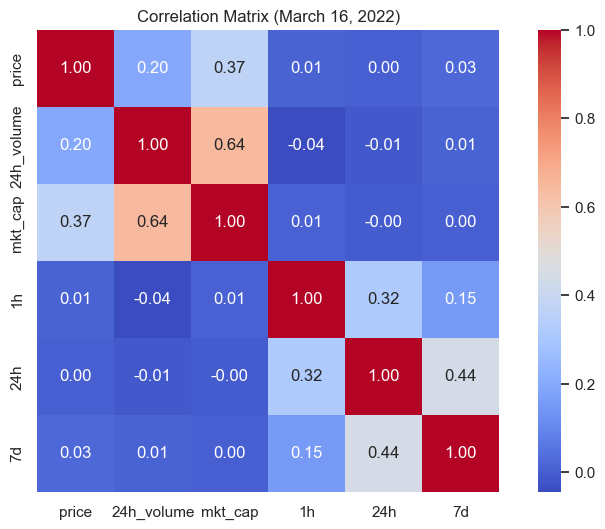

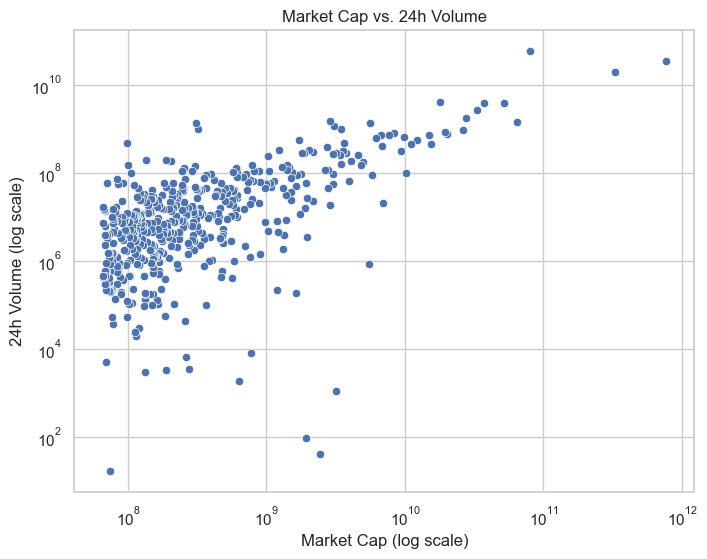

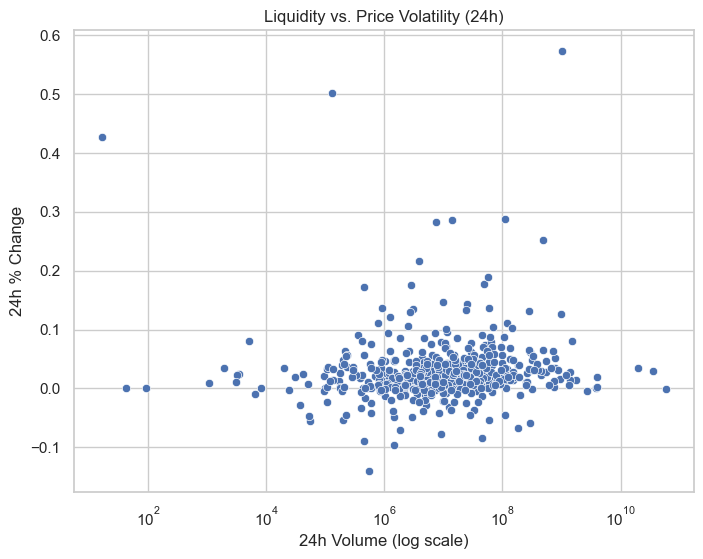

In [4]:
# Compute correlations among relevant numerical features
correlation_matrix = df1[['price', '24h_volume', 'mkt_cap', '1h', '24h', '7d']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix (March 16, 2022)")
plt.show()

# Scatter plot: Volume vs Market Cap
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='mkt_cap', y='24h_volume')
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Market Cap (log scale)")
plt.ylabel("24h Volume (log scale)")
plt.title("Market Cap vs. 24h Volume")
plt.show()

# Scatter plot: Volume vs. 24h % Change (Volatility)
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df1, x='24h_volume', y='24h')
plt.xscale('log')
plt.xlabel("24h Volume (log scale)")
plt.ylabel("24h % Change")
plt.title("Liquidity vs. Price Volatility (24h)")
plt.show()
